In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

import warnings
warnings.filterwarnings('ignore')

### Load the dataset

- Load the train data and using all your knowledge of pandas try to explore the different statistical properties like correlation of the dataset.

In [2]:
# Code starts here
#Lode data set
Train=pd.read_csv('train.csv')
Train

,Id,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Longtitude,Regionname,Propertycount
0,124,3,2,995000,1,135,6.3,3143,2,2,0,100.0,1998,26,145.01600,5,4836
1,5905,2,0,1080000,1,155,2.0,3066,1,0,0,94.0,1890,31,144.98863,2,4553
2,5963,3,0,725000,1,196,17.9,3082,2,2,602,129.0,1980,29,145.06912,2,10529
3,3521,4,0,1330000,1,251,8.0,3016,3,2,217,266.0,2003,10,144.87960,6,6380
4,3738,3,0,620000,1,221,12.4,3060,1,2,604,190.0,1970,23,144.96860,2,5070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4776,335,3,0,2251000,1,135,9.2,3104,1,2,888,137.0,1950,2,145.09490,5,7809
4777,4714,3,2,1275000,1,255,10.1,3163,2,2,750,132.0,1984,8,145.04924,5,7822
4778,2004,5,0,1975000,1,111,5.6,3101,2,1,531,1022.0,1890,2,145.04110,5,10331
4779,227,4,0,1800000,1,106,11.0,3147,2,4,749,206.0,1950,2,145.07700,5,3052


In [3]:
train=Train.drop('Id',axis=1)
train

,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Longtitude,Regionname,Propertycount
0,3,2,995000,1,135,6.3,3143,2,2,0,100.0,1998,26,145.01600,5,4836
1,2,0,1080000,1,155,2.0,3066,1,0,0,94.0,1890,31,144.98863,2,4553
2,3,0,725000,1,196,17.9,3082,2,2,602,129.0,1980,29,145.06912,2,10529
3,4,0,1330000,1,251,8.0,3016,3,2,217,266.0,2003,10,144.87960,6,6380
4,3,0,620000,1,221,12.4,3060,1,2,604,190.0,1970,23,144.96860,2,5070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4776,3,0,2251000,1,135,9.2,3104,1,2,888,137.0,1950,2,145.09490,5,7809
4777,3,2,1275000,1,255,10.1,3163,2,2,750,132.0,1984,8,145.04924,5,7822
4778,5,0,1975000,1,111,5.6,3101,2,1,531,1022.0,1890,2,145.04110,5,10331
4779,4,0,1800000,1,106,11.0,3147,2,4,749,206.0,1950,2,145.07700,5,3052


In [4]:
# Descriptive stat
train.describe()

,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Longtitude,Regionname,Propertycount
count,4781.000000,4781.000000,4.781000e+03,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000
mean,2.964861,0.540473,1.080936e+06,1.441330,131.485254,10.045367,3103.308931,1.587952,1.605522,480.500105,143.157231,1964.338423,13.609705,144.991934,3.772223,7477.201213
std,0.957911,0.837337,6.757098e+05,1.141898,77.203630,5.871496,87.538064,0.711276,0.946698,899.489722,91.438501,38.064151,10.389644,0.103051,2.024068,4395.746550
min,1.000000,0.000000,1.450000e+05,0.000000,2.000000,0.000000,3000.000000,1.000000,0.000000,0.000000,0.000000,1196.000000,-1.000000,144.545320,0.000000,389.000000
25%,2.000000,0.000000,6.300000e+05,1.000000,73.000000,6.100000,3044.000000,1.000000,1.000000,168.000000,94.000000,1940.000000,2.000000,144.927270,2.000000,4380.000000
50%,3.000000,0.000000,9.000000e+05,1.000000,135.000000,9.200000,3083.000000,1.000000,2.000000,411.000000,126.000000,1970.000000,15.000000,144.997500,5.000000,6567.000000
75%,4.000000,1.000000,1.337000e+06,1.000000,194.000000,13.000000,3147.000000,2.000000,2.000000,638.000000,172.000000,2000.000000,23.000000,145.055720,5.000000,10331.000000
max,8.000000,2.000000,9.000000e+06,4.000000,267.000000,47.300000,3977.000000,8.000000,10.000000,37000.000000,3112.000000,2018.000000,32.000000,145.445300,7.000000,21650.000000


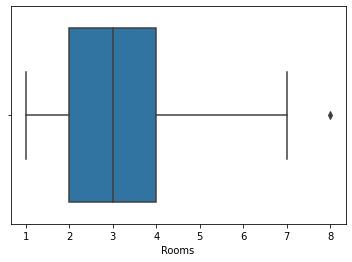

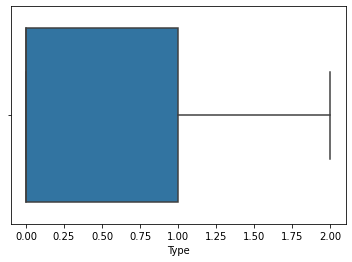

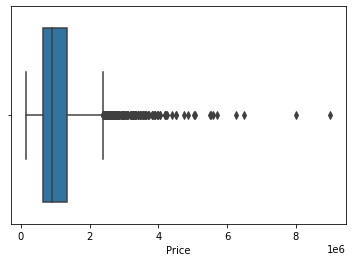

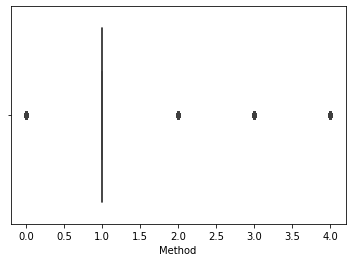

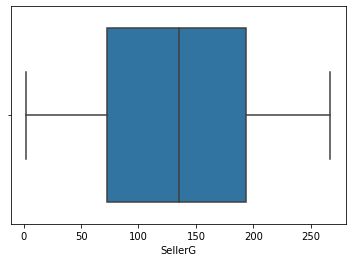

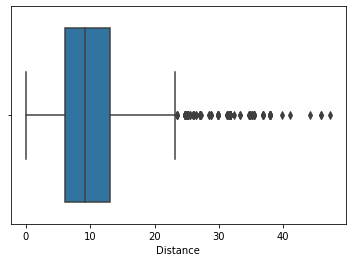

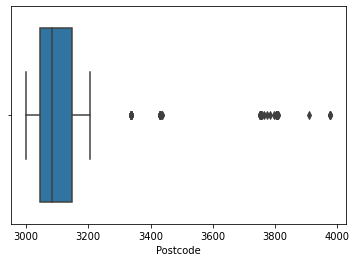

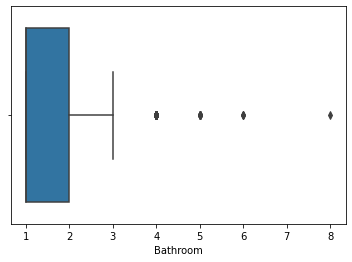

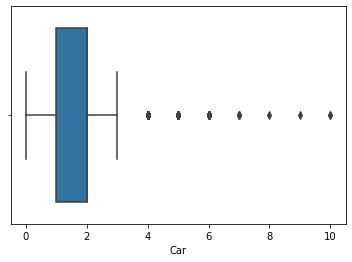

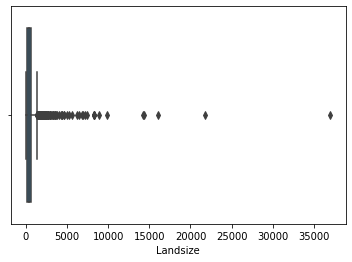

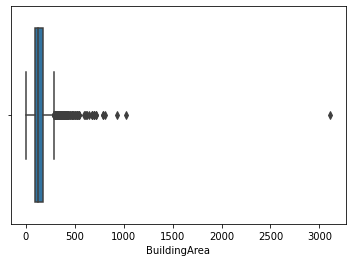

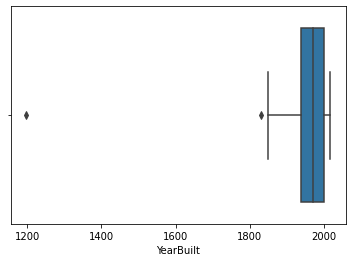

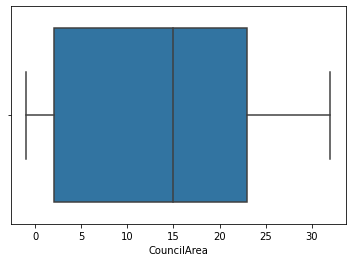

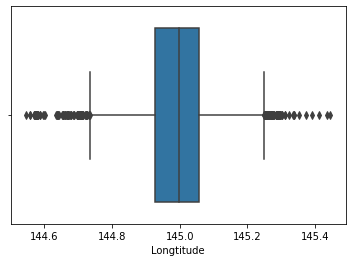

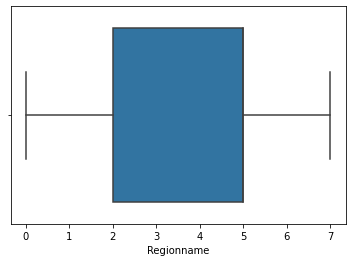

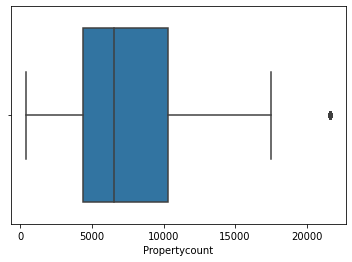

In [5]:
for column in train:
    plt.figure()
    sns.boxplot(x=train[column])

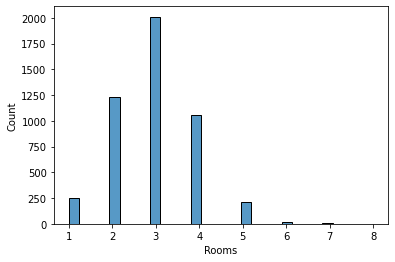

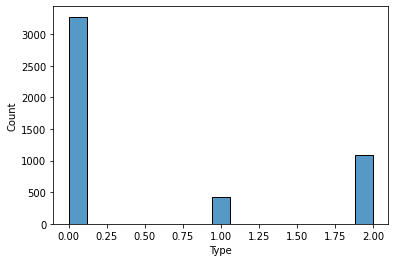

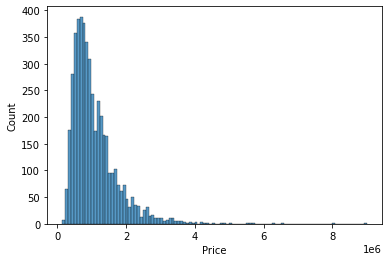

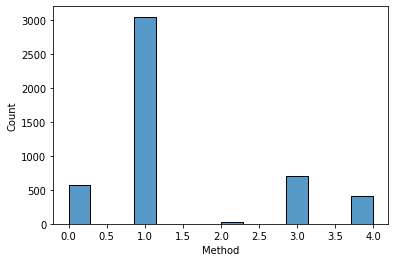

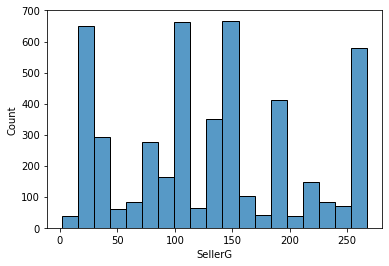

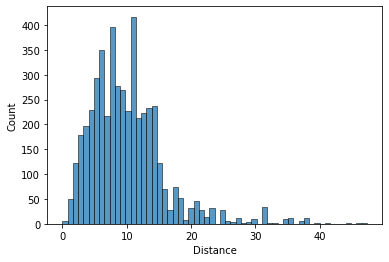

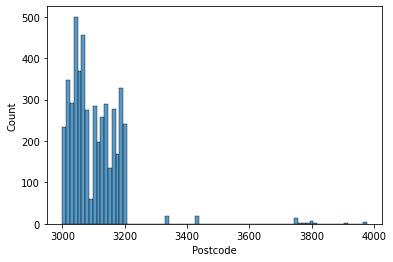

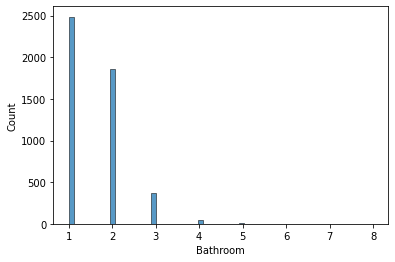

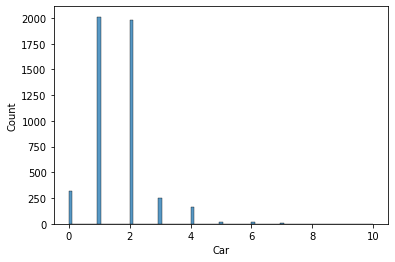

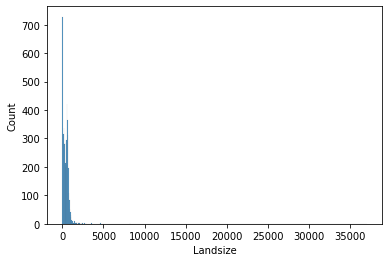

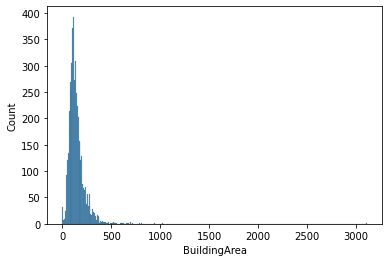

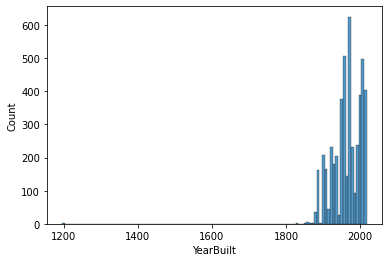

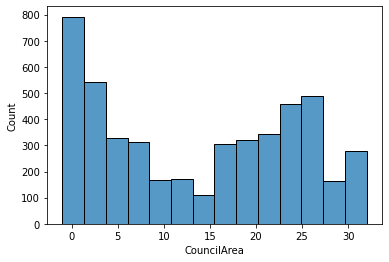

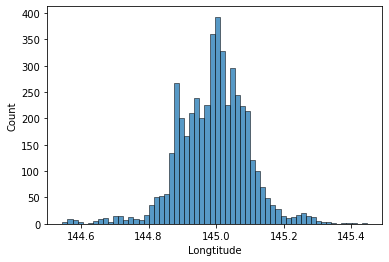

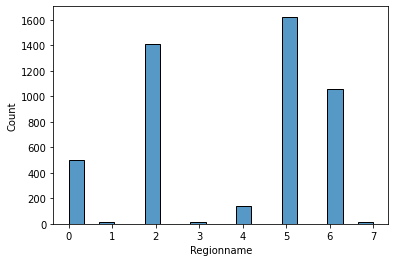

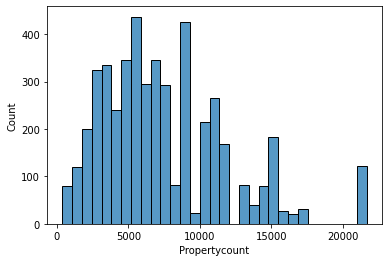

In [6]:
for column in train:
    plt.figure()
    sns.histplot(data=train, x=train[column])

In [7]:
# Check skewness in the features
print("Skewness for different features is shown as below")
train.skew()

Skewness for different features is shown as below


Rooms             0.208722
Type              1.029247
Price             2.429553
Method            1.071776
SellerG           0.129703
Distance          1.674962
Postcode          3.921342
Bathroom          1.328302
Car               1.532654
Landsize         21.066059
BuildingArea      8.885376
YearBuilt        -2.135044
CouncilArea       0.033060
Longtitude       -0.270886
Regionname       -0.498197
Propertycount     1.039731
dtype: float64

<AxesSubplot:>

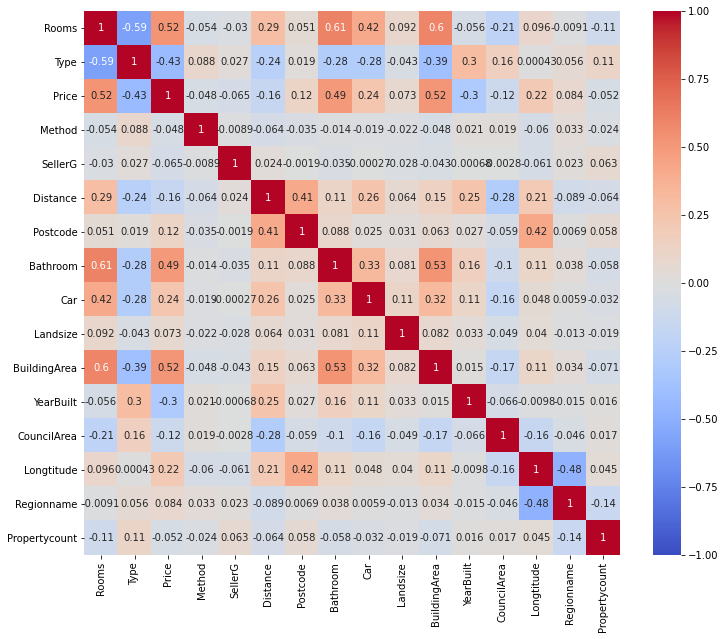

In [8]:
# Plotting a heatmap using to check for correlation between the features
plt.figure(figsize=(12, 10))
sns.heatmap(train.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

In [9]:
# Importent feachers for price: BuildingArea, Bathroom, Type, Rooms
# Select upper and lower threshold

upper_threshold = 0.5
lower_threshold = -0.5

# List the correlation pairs
correlation = train.corr().unstack().sort_values(kind='quicksort')
corr_pair = correlation[((correlation>upper_threshold) | (correlation<lower_threshold)) & (correlation!=1)]
corr_pair

Rooms         Type           -0.590817
Type          Rooms          -0.590817
Price         BuildingArea    0.519207
BuildingArea  Price           0.519207
Rooms         Price           0.523579
Price         Rooms           0.523579
Bathroom      BuildingArea    0.525465
BuildingArea  Bathroom        0.525465
Rooms         BuildingArea    0.595395
BuildingArea  Rooms           0.595395
Rooms         Bathroom        0.607276
Bathroom      Rooms           0.607276
dtype: float64

In [10]:
# Code ends here.

## Model building

- Separate the features and target and then split the train data into train and validation set.
- Apply different models of your choice and  then predict on the validation data and find the `accuracy_score` for this prediction.
- Try improving upon the `accuracy_score` using different regularization techniques.

In [11]:
# Code starts here
# Feachers: X
X=train.drop('Price', axis=1)
X.head(3)

,Rooms,Type,Method,SellerG,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Longtitude,Regionname,Propertycount
0,3,2,1,135,6.3,3143,2,2,0,100.0,1998,26,145.01600,5,4836
1,2,0,1,155,2.0,3066,1,0,0,94.0,1890,31,144.98863,2,4553
2,3,0,1,196,17.9,3082,2,2,602,129.0,1980,29,145.06912,2,10529


In [12]:
#Target: y
y=train.Price

In [13]:
cols = X.columns
print("Below columns are present in dataset:")
cols.to_list()

Below columns are present in dataset:


['Rooms',
 'Type',
 'Method',
 'SellerG',
 'Distance',
 'Postcode',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'CouncilArea',
 'Longtitude',
 'Regionname',
 'Propertycount']

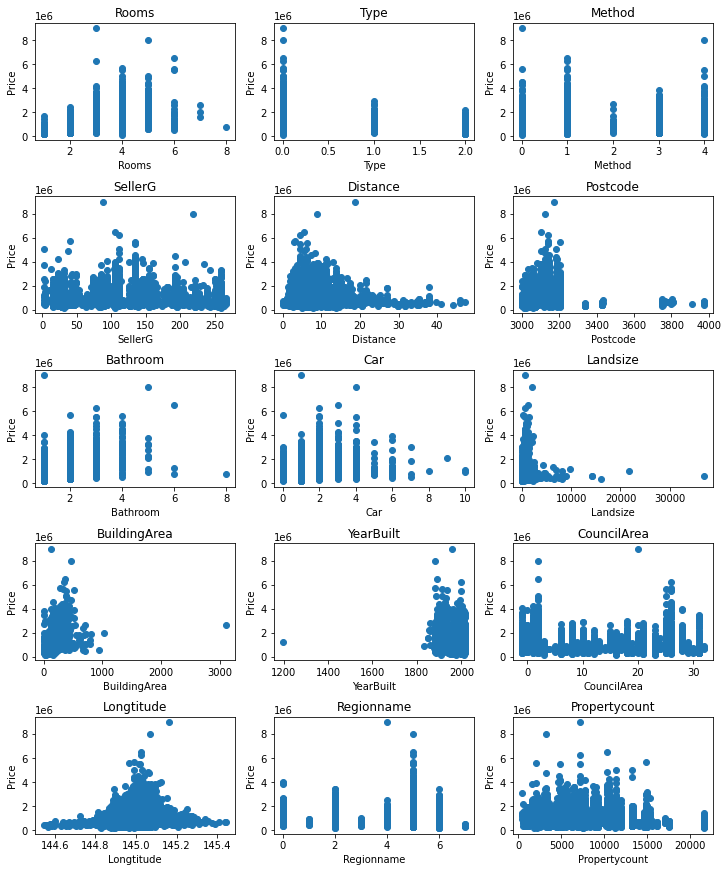

In [14]:
fig, axes = plt.subplots(nrows = 5, ncols = 3, figsize=(10,12), constrained_layout=True)

for i in range(0,5):
    for j in range(0,3):
        col = cols[i*3 + j]
        axes[i,j].set_title(col)
        axes[i,j].scatter(train[col],y)
        axes[i,j].set_xlabel(col)
        axes[i,j].set_ylabel('Price')
        
plt.show()

## Train Test split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)


## Model building
### Apply Liner Regression model

In [16]:
#Model building

#Instantiate linear regression model
lm = LinearRegression()

# fit the model
lm.fit(X_train,y_train)

# predict the result
y_pred = lm.predict(X_test)


In [17]:
# Calculate mse
lm_mse = mean_squared_error(y_test, y_pred)

# Calculate rmse
lm_rmse=np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate r2_score
lm_r2 = r2_score(y_test, y_pred)

print('lm_mse=',lm_mse)
print('lm_rmse=', lm_rmse)
print('lm_r2=', "%.4f" % lm_r2)

lm_mse= 144277904699.05487
lm_rmse= 379839.31431469135
lm_r2= 0.6710


### Liner regression with cross validation

In [18]:
# Initiate Linear Regression Model
lm = LinearRegression()

# Initiate cross validation score
score = cross_val_score(lm,X_train,y_train,scoring='r2',cv=10)
print(score)

#calculate mean of the score

mean_score = np.mean(score)
print('\nlm_cv_r2=',"%.4f" % mean_score)

[0.57769766 0.69786557 0.68962943 0.21091495 0.54907255 0.63559724
 0.45884698 0.65518455 0.61303293 0.58507978]

lm_cv_r2= 0.5673


### Applying Lasso 

In [19]:
lasso=Lasso()
lasso.fit(X_train,y_train)

# fit and predict
lasso_pred=lasso.predict(X_test)

lasso_mse = mean_squared_error(y_test, lasso_pred)
print('lasso_mse=',"%.2f" %  lasso_mse )
# calculate RMSE
lasso_rmse=np.sqrt(mean_squared_error(lasso_pred, y_test))
print('lasso_rmse=',"%.2f" % lasso_rmse)

lasso_r2 = r2_score(y_test, lasso_pred)
print('lasso_r2=', "%.4f" % lasso_r2)

lasso_mse= 144278051207.50
lasso_rmse= 379839.51
lasso_r2= 0.6710


### Applying Ridge

In [20]:
# instantiate lasso model
ridge=Ridge()
ridge.fit(X_train,y_train)

# fit and predict
ridge_pred=ridge.predict(X_test)

ridge_mse = mean_squared_error(y_test, ridge_pred)
print('ridge_mse=',"%.2f" %  ridge_mse )

# calculate RMSE
ridge_rmse=np.sqrt(mean_squared_error(ridge_pred, y_test))
print('ridge_rmse=', "%.2f" %  ridge_rmse)

ridge_r2 = r2_score(y_test, ridge_pred)
print('lasso_r2=', "%.4f" % ridge_r2)

ridge_mse= 144371423315.89
ridge_rmse= 379962.40
lasso_r2= 0.6708


## Applying lasso and ridge with cross validation

In [21]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
scorer = make_scorer(mean_squared_error, greater_is_better = False)



# cross validation with L1
lasso_cv_r2=np.mean(cross_val_score(lasso, X_train, y_train, scoring='r2', cv=10))
print('\nlasso_cv_r2=',lasso_cv_r2)

#score = cross_val_score(lm,X_train,y_train,scoring='r2',cv=10)

# cross validation with L2
ridge_cv_r2=np.mean(cross_val_score(ridge, X_train, y_train, scoring='r2', cv=10))
print('\nridge_cv_r2=',ridge_cv_r2)



lasso_cv_r2= 0.567291210314773

ridge_cv_r2= 0.5670587984707811


### Applying Lasso and Ridge with grid search

In [22]:
# import packages
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

In [23]:
# regularization parameters for grid search
ridge_lambdas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60]
lasso_lambdas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1]

# Code starts here

# instantiate lasso and ridge models
ridge_model=Ridge()
lasso_model=Lasso()

# grid search on lasso and ridge
ridge_grid=GridSearchCV(estimator= ridge_model, param_grid=dict(alpha=ridge_lambdas))
ridge_grid.fit(X_train,y_train)

lasso_grid=GridSearchCV(estimator= lasso_model, param_grid=dict(alpha=lasso_lambdas))
lasso_grid.fit(X_train,y_train)
# make predictions 
ridge_grid_pred=ridge_grid.predict(X_test)
lasso_grid_pred=lasso_grid.predict(X_test)

# print out which is better
ridge_grid_rmse=np.sqrt(mean_squared_error(ridge_grid_pred, y_test))
lasso_grid_rmse=np.sqrt(mean_squared_error(lasso_grid_pred, y_test))
print('ridge_rmse=', round(ridge_rmse,3), '\nlasso_rmse=', round(lasso_rmse,3))

ridge_grid_r2 = r2_score(y_test, ridge_grid_pred)
print('\nridge_grid_r2=', "%.4f" % ridge_grid_r2)

lasso_grid_r2 = r2_score(y_test, lasso_grid_pred)
print('lasso_grid_r2=', "%.4f" % lasso_grid_r2)


ridge_rmse= 379962.397 
lasso_rmse= 379839.507

ridge_grid_r2= 0.6710
lasso_grid_r2= 0.6710


### Applying Polynomial feachers

In [24]:
Input=[('polynomial',PolynomialFeatures(degree=2)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(X_train,y_train)

pipe_pred = pipe.predict(X_test)
pipe_mse = mean_squared_error(y_test, pipe_pred)
print('pipe_mse=',pipe_mse)
pipe_rmse=np.sqrt(mean_squared_error(y_test, pipe_pred))
print('pipe_rmse=', pipe_rmse)
# Calculate r2_score
pipe_r2 = r2_score(y_test, pipe_pred)
print('pipe_r2=', "%.4f" % pipe_r2)

pipe_mse= 119598756794.40012
pipe_rmse= 345830.531900236
pipe_r2= 0.7273


In [25]:
# Code ends here.

### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [26]:
# Code starts here
Test=pd.read_csv('test.csv')
test=Test.drop('Id',axis=1)

# Storing the id from the test file
id_ = Test['Id']

In [27]:
# Predict on the test data
y_pred_test = pipe.predict(test)

# Create a sample submission file
sample_submission = pd.DataFrame({'Id':id_,'Price':y_pred_test})
sample_submission.head(5)

,Id,Price
0,5067,7.202824e+05
1,3722,8.480875e+05
2,6820,1.756156e+06
3,3103,6.617626e+05
4,2820,8.336225e+05


In [28]:
# Convert the sample submission file into a csv file
sample_submission.to_csv('sample_submission.csv',index=False)

# Code ends here.